 **House Price Segmentation project**
  is to categorize properties into different price tiers—Luxury, Mid-range, and Affordable—using K-Means clustering based on property features like location, size, amenities, and price range.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [3]:
area_sq_ft = np.random.randint(500,2000,100)
prices_in_lakhs = np.random.randint(50,99,100)
df = pd.DataFrame({
    "Area": area_sq_ft,
    "Price":prices_in_lakhs,

})
df.head()

,Area,Price
0,1930,86
1,1399,92
2,1511,56
3,578,69
4,1536,51


In [4]:
#cluster houses based on area and price

x=df[["Area","Price"]]
kmeans = KMeans(n_clusters=3,random_state=42,n_init=10)
df['cluster']=kmeans.fit_predict(x)
print("clusters or centroids :",kmeans.cluster_centers_)
df.head()

clusters or centroids : [[1638.41025641   76.87179487]
 [ 698.07142857   72.10714286]
 [1079.21212121   68.45454545]]


,Area,Price,cluster
0,1930,86,0
1,1399,92,0
2,1511,56,0
3,578,69,1
4,1536,51,0


In [5]:
#label  clusters as " luxury","mid-range","afforadable"

centroid = kmeans.cluster_centers_
sort_indices = np.argsort(centroid[:,1])
cluster_labels = {sort_indices[0]:"Affordable" , sort_indices[1]:"Mid-Range",  sort_indices[2]:"Luxury"}
df["cluster_labels"]  =df["cluster"].map(cluster_labels)
df.head()

,Area,Price,cluster,cluster_labels
0,1930,86,0,Luxury
1,1399,92,0,Luxury
2,1511,56,0,Luxury
3,578,69,1,Mid-Range
4,1536,51,0,Luxury


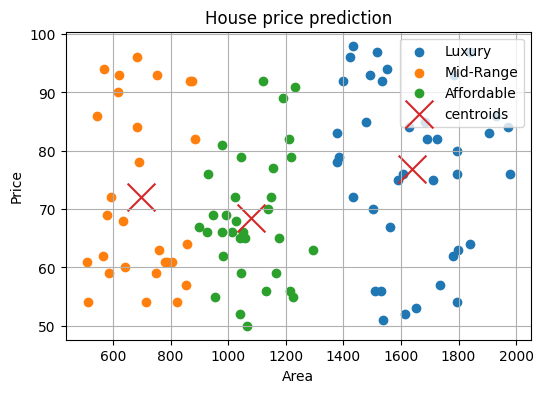

In [6]:
plt.figure(figsize = (6,4))

for cluster in range(kmeans.n_clusters):
     cluster_data = df[df["cluster"] == cluster]
     plt.scatter(cluster_data["Area"],cluster_data['Price'],label=cluster_labels[cluster])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,marker = 'x',label = 'centroids')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("House price prediction")
plt.grid()
plt.legend()
plt.show()

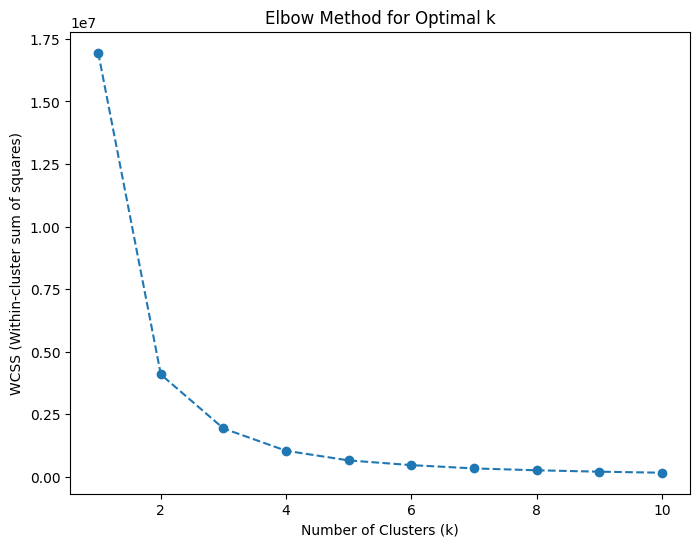

In [7]:
# using elbow for k
x=df[["Area","Price"]]

wcss = []
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal k")
plt.show()
